<span style="background-color: transparent; font-size: 12pt; font-family: Arial, sans-serif; color: rgb(0, 0, 0); font-variant-numeric: normal; font-variant-east-asian: normal; vertical-align: baseline; white-space: pre-wrap;">HA (Alternative Hypothesis):</span> <span style="background-color: transparent; font-size: 11pt; font-family: Arial, sans-serif; color: rgb(0, 0, 0); font-variant-numeric: normal; font-variant-east-asian: normal; vertical-align: baseline; white-space: pre-wrap;">There is a strong positive correlation between the suicide rate and the male gender in the United States, suggesting that males are more likely to have a higher suicide rate compared to females.</span>  

<span style="font-size: 12pt; font-family: Roboto, sans-serif; color: rgb(0, 0, 0); background-color: transparent; font-variant-numeric: normal; font-variant-east-asian: normal; vertical-align: baseline; white-space: pre-wrap;">H0 (Null Hypothesis):</span> <span style="font-size: 12pt; font-family: Roboto, sans-serif; color: rgb(55, 65, 81); background-color: transparent; font-variant-numeric: normal; font-variant-east-asian: normal; vertical-align: baseline; white-space: pre-wrap;">There is no significant correlation between the suicide rate and gender (male) in the United States, indicating that there is no difference or association between being male and having a higher suicide rate compared to females.</span>

- <span style="font-size: 12pt; font-family: Roboto, sans-serif; color: rgb(55, 65, 81); background-color: transparent; font-variant-numeric: normal; font-variant-east-asian: normal; vertical-align: baseline; white-space: pre-wrap;"><span style="color: rgb(0, 0, 0); font-family: Arial, sans-serif;">Kaggle Self Harm Deaths Worldwide</span><br></span>
- <span style="background-color: transparent; font-variant-numeric: normal; font-variant-east-asian: normal; vertical-align: baseline;"><font color="#000000" face="Arial, sans-serif"><span style="font-size: 16px; white-space: pre-wrap;">https://www.kaggle.com/datasets/thomaseltonau/self-harm-and-substance-abuse-deaths-worldwide</span></font><br></span>

In [2]:
USE[WSuicideAndDrug];

Commands completed successfully.

Total execution time: 00:00:00.001

What are the Top Five Countries with the greater suicide rate?

In 2017 was Guyana 61/100000, Uruguay, Estonia, USA and Russia.

In [9]:
SELECT TOP 5 [ISO_Code], [Year], TotalDeaths, Population, (MortalityRate * 100000) [Mortality Deaths/100,000]
FROM (
    SELECT [ISO_Code], [Year], SUM([Deaths]) AS TotalDeaths, SUM([Age_and_Sex_Population]) AS Population,
        SUM([Deaths]) * 1.0 / SUM([Age_and_Sex_Population]) AS MortalityRate -- Calculate mortality rate
    FROM [dbo].[ww_deaths_suicide_or_drugabuse]
    WHERE [Year] = 2019
        AND [Sex] = 'All'
        AND [Cause] = 'Intentional self-harm'
    GROUP BY [ISO_Code], [Year]
) AS SubQueryAlias
ORDER BY MortalityRate DESC; -- Ordering by MortalityRate in descending order

SELECT TOP 5 [ISO_Code], [Year], TotalDeaths, Population, (MortalityRate * 100000) AS [Mortality Deaths/100,000]
FROM (
    SELECT [ISO_Code], [Year], SUM([Deaths]) AS TotalDeaths, SUM([Age_and_Sex_Population]) AS Population,
        SUM([Deaths]) * 1.0 / SUM([Age_and_Sex_Population]) AS MortalityRate -- Calculate mortality rate
    FROM [dbo].[ww_deaths_suicide_or_drugabuse]
    WHERE [Year] = 2020
        AND [Sex] = 'All'
        AND [Cause] = 'Intentional self-harm'
    GROUP BY [ISO_Code], [Year]
) AS SubQueryAlias
ORDER BY MortalityRate DESC; -- Ordering by MortalityRate in descending order


Warning: Null value is eliminated by an aggregate or other SET operation.

(5 rows affected)

Warning: Null value is eliminated by an aggregate or other SET operation.

(5 rows affected)

Total execution time: 00:00:00.060

ISO_Code,Year,TotalDeaths,Population,"Mortality Deaths/100,000"
GUY,2019,358.00,798761.00,44.800000
URY,2019,1446.00,3428412.00,42.100000
EST,2019,386.00,1327039.00,29.000000
USA,2019,94956.00,334319680.00,28.400000
KOR,2019,27598.00,102674861.00,26.800000


ISO_Code,Year,TotalDeaths,Population,"Mortality Deaths/100,000"
URY,2020,1436.00,3429087.00,41.800000
EST,2020,420.00,1329449.00,31.500000
CUB,2020,3106.00,11300695.00,27.400000
USA,2020,91880.00,335942016.00,27.300000
KOR,2020,26390.00,102698518.00,25.600000


In [15]:
SELECT TOP 5
    [ISO_Code],
    MortalityRate
FROM (
    SELECT
        [ISO_Code],
        SUM([Deaths]) * 1.0 / SUM([Age_and_Sex_Population]) AS MortalityRate -- Calculate mortality rate
    FROM [dbo].[ww_deaths_suicide_or_drugabuse]
    WHERE [Year] = 2017
        AND [Sex] = 'All'
        AND [Cause] = 'Intentional self-harm'
    GROUP BY [ISO_Code]
) AS SubQueryAlias
ORDER BY MortalityRate DESC; -- Ordering by MortalityRate in descending order


Warning: Null value is eliminated by an aggregate or other SET operation.

(5 rows affected)

Total execution time: 00:00:00.470

ISO_Code,MortalityRate
GUY,0.000610
URY,0.000402
EST,0.000343
USA,0.000285
RUS,0.000278


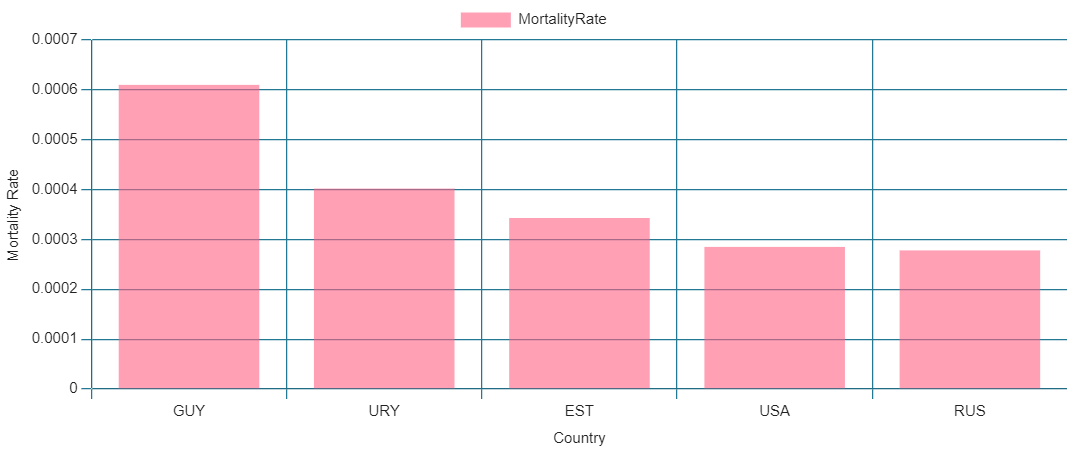

What is the Suicide Tendency during 2017, 2018, 2019, 2020 in the USA?

In [16]:
SELECT [Year], MortalityRate AS [Suicidal in USA]
FROM (
    SELECT [Year], 
        SUM(CASE WHEN [Year] = 2017 THEN [Deaths] END) * 1.0 / NULLIF(SUM(CASE WHEN [Year] = 2017 THEN [Age_and_Sex_Population] END), 0) AS MortalityRate
    FROM [dbo].[IntentionalSelfHarmTable]
    WHERE [ISO_Code] = 'USA'
        AND [Sex] = 'All'
        AND [Cause] = 'Intentional self-harm'
        AND [Year] IN (2017, 2018, 2019, 2020)
    GROUP BY [Year]
    UNION ALL
    SELECT [Year], 
        SUM(CASE WHEN [Year] = 2018 THEN [Deaths] END) * 1.0 / NULLIF(SUM(CASE WHEN [Year] = 2018 THEN [Age_and_Sex_Population] END), 0) AS MortalityRate
    FROM [dbo].[IntentionalSelfHarmTable]
    WHERE [ISO_Code] = 'USA'
        AND [Sex] = 'All'
        AND [Cause] = 'Intentional self-harm'
        AND [Year] IN (2017, 2018, 2019, 2020)
    GROUP BY [Year]
    UNION ALL
    SELECT [Year], 
        SUM(CASE WHEN [Year] = 2019 THEN [Deaths] END) * 1.0 / NULLIF(SUM(CASE WHEN [Year] = 2019 THEN [Age_and_Sex_Population] END), 0) AS MortalityRate
    FROM [dbo].[IntentionalSelfHarmTable]
    WHERE [ISO_Code] = 'USA'
        AND [Sex] = 'All'
        AND [Cause] = 'Intentional self-harm'
        AND [Year] IN (2017, 2018, 2019, 2020)
    GROUP BY [Year]
    UNION ALL
    SELECT [Year], 
        SUM(CASE WHEN [Year] = 2020 THEN [Deaths] END) * 1.0 / NULLIF(SUM(CASE WHEN [Year] = 2020 THEN [Age_and_Sex_Population] END), 0) AS MortalityRate
    FROM [dbo].[IntentionalSelfHarmTable]
    WHERE [ISO_Code] = 'USA'
        AND [Sex] = 'All'
        AND [Cause] = 'Intentional self-harm'
        AND [Year] IN (2017, 2018, 2019, 2020)
    GROUP BY [Year]
) AS MortalityData
WHERE MortalityRate IS NOT NULL
ORDER BY [Year];

Warning: Null value is eliminated by an aggregate or other SET operation.

(4 rows affected)

Total execution time: 00:00:02.652

Year,Suicidal in USA
2017,0.000285
2018,0.000290
2019,0.000284
2020,0.000273


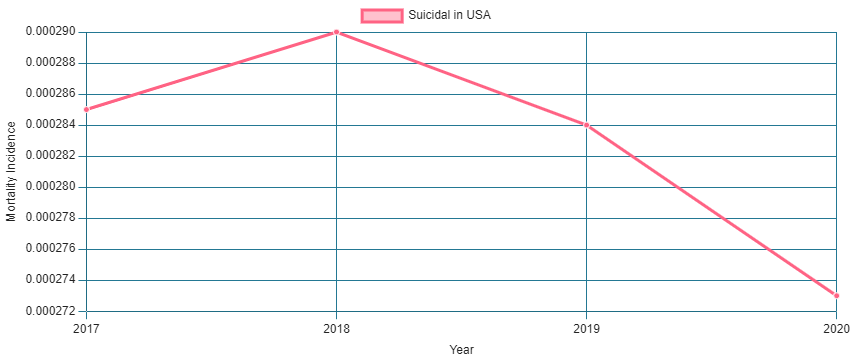

What about suicidal instances in the USA by gender?

In [25]:
SELECT [Year], SUM(CASE WHEN [Sex] = 'Female' THEN [Deaths] ELSE 0 END) AS FemaleDeaths,
    SUM(CASE WHEN [Sex] = 'Male' THEN [Deaths] ELSE 0 END) AS MaleDeaths
FROM [dbo].[IntentionalSelfHarmTable]
WHERE [ISO_Code] = 'USA'
    AND [Cause] = 'Intentional self-harm'
    AND [Year] IN (2020)
GROUP BY [Year]
ORDER BY [Year];

(1 row affected)

Total execution time: 00:00:00.017

Year,FemaleDeaths,MaleDeaths
2020,18832.00,73048.00


Doughnut Chart: Death Gender Distribution in the USA 2020

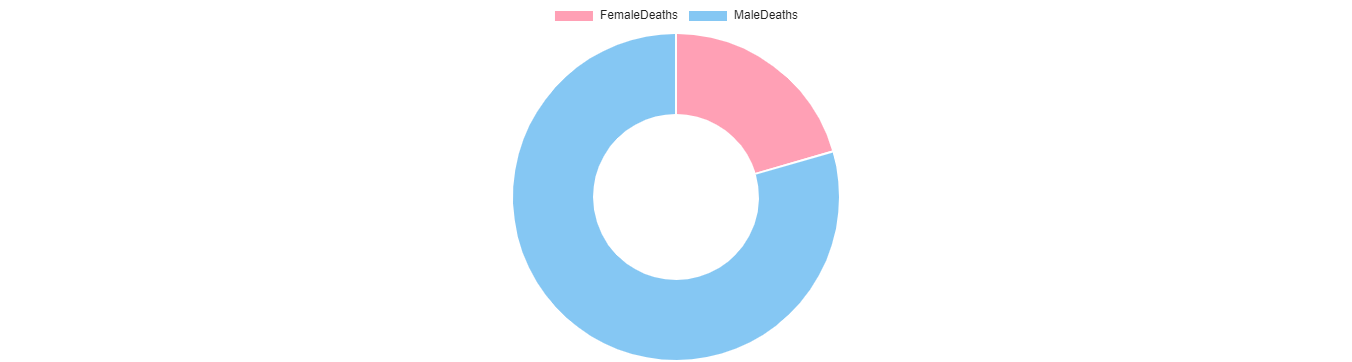

In [17]:
SELECT [Year], SUM(CASE WHEN [Sex] = 'Female' THEN [Deaths] ELSE 0 END) AS FemaleDeaths,
    SUM(CASE WHEN [Sex] = 'Male' THEN [Deaths] ELSE 0 END) AS MaleDeaths
FROM [dbo].[IntentionalSelfHarmTable]
WHERE [ISO_Code] = 'USA'
    AND [Cause] = 'Intentional self-harm'
    AND [Year] IN (2017, 2018, 2019, 2020)
GROUP BY [Year]
ORDER BY [Year];

(4 rows affected)

Total execution time: 00:00:02.636

Year,FemaleDeaths,MaleDeaths
2017,20762.00,73452.00
2018,21148.00,75476.00
2019,20490.00,74466.00
2020,18832.00,73048.00


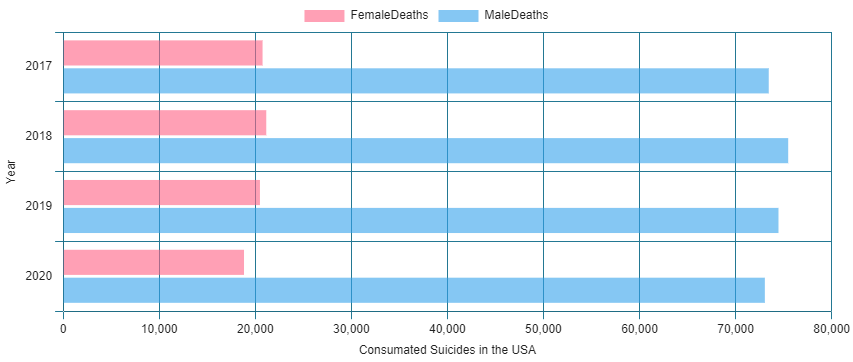

In [19]:
SELECT '2017' AS Year, 'Female' AS Gender, 20762.00 AS Deaths
UNION ALL
SELECT '2017', 'Male', 73452.00
UNION ALL
SELECT '2018', 'Female', 21148.00
UNION ALL
SELECT '2018', 'Male', 75476.00
UNION ALL
SELECT '2019', 'Female', 20490.00
UNION ALL
SELECT '2019', 'Male', 74466.00
UNION ALL
SELECT '2020', 'Female', 18832.00
UNION ALL
SELECT '2020', 'Male', 73048.00;


(8 rows affected)

Total execution time: 00:00:00.008

Year,Gender,Deaths
2017,Female,20762.00
2017,Male,73452.00
2018,Female,21148.00
2018,Male,75476.00
2019,Female,20490.00
2019,Male,74466.00
2020,Female,18832.00
2020,Male,73048.00


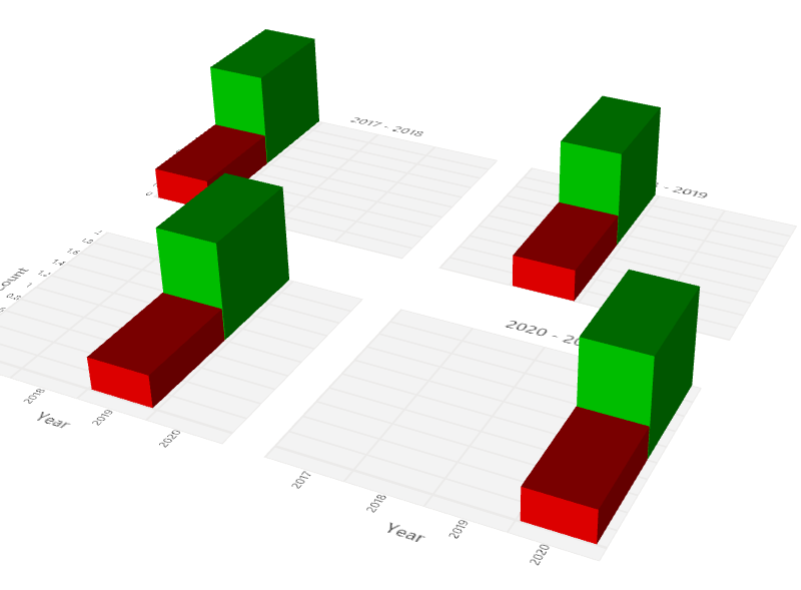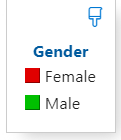

What is the suicidal cases by age distribution?

In [18]:
USE [WSuicideAndDrug]
SELECT [Age_Range], 
    SUM(CASE WHEN [Sex] = 'Female' THEN [Deaths] ELSE 0 END) AS FemaleDeaths,
    SUM(CASE WHEN [Sex] = 'Male' THEN [Deaths] ELSE 0 END) AS MaleDeaths
FROM IntentionalSelfHarmTable
WHERE [ISO_Code] = 'USA'
    AND [Cause] = 'Intentional self-harm'
    AND [Year] = 2018
    AND [Age_Range] NOT IN ('0', '1', '2', '3', '4','All', 'Unknown')
GROUP BY [Age_Range]
ORDER BY [Age_Range];


(19 rows affected)

Total execution time: 00:00:00.138

Age_Range,FemaleDeaths,MaleDeaths
10-14,206.00,390.00
15-19,538.00,1866.00
20-24,684.00,3122.00
25-29,815.00,3306.00
30-34,853.00,3039.00
35-39,875.00,3075.00
40-44,867.00,2702.00
45-49,991.00,3023.00
50-54,1149.00,3173.00
55-59,1182.00,3569.00


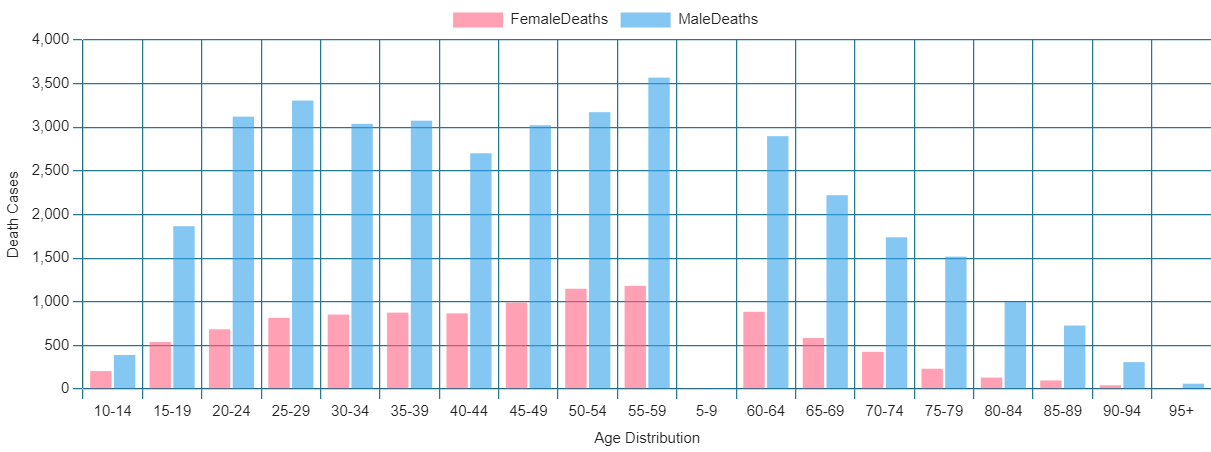

In [23]:
SELECT TOP 10 [ISO_Code], [Country], [Year], TotalDeaths, Population, MortalityRate
FROM (
    SELECT [ISO_Code], [Country], [Year], SUM([Deaths]) AS TotalDeaths, SUM([Age_and_Sex_Population]) AS Population,
        SUM([Deaths]) * 1.0 / SUM([Age_and_Sex_Population]) AS MortalityRate -- Calculate mortality rate
    FROM [dbo].[ww_deaths_suicide_or_drugabuse]
    WHERE [Year] = 2017
        AND [Sex] = 'All'
        AND [Cause] = 'Intentional self-harm'
    GROUP BY [ISO_Code], [Country], [Year]
) AS SubQueryAlias
ORDER BY MortalityRate ASC; -- Ordering by MortalityRate in ascending order


Warning: Null value is eliminated by an aggregate or other SET operation.

(10 rows affected)

Total execution time: 00:00:00.026

ISO_Code,Country,Year,TotalDeaths,Population,MortalityRate
EGY,Egypt,2017,134.00,190224193.00,0.000000
LBY,Libyan Arab Jamahiriya,2017,10.00,13140232.00,0.000000
PSE,Occupied Palestinian Territory,2017,2.00,4700954.00,0.000000
MYS,Malaysia,2017,44.00,31975812.00,0.000001
JOR,Jordan,2017,28.00,10215384.00,0.000002
LBN,Lebanon,2017,28.00,8576348.44,0.000003
MYT,Mayotte,2017,1.00,271576.00,0.000003
SLB,Solomon Islands,2017,2.00,663101.11,0.000003
BIH,Bosnia and Herzegovina,2017,16.00,3440025.00,0.000004
OMN,Oman,2017,26.00,4541853.00,0.000005


In [24]:
USE [WSuicideAndDrug]
SELECT [Age_Range], 
    SUM(CASE WHEN [Sex] = 'Female' THEN [Deaths] ELSE 0 END) AS FemaleDeaths,
    SUM(CASE WHEN [Sex] = 'Male' THEN [Deaths] ELSE 0 END) AS MaleDeaths
FROM IntentionalSelfHarmTable
WHERE [ISO_Code] = 'EGY'
    AND [Cause] = 'Intentional self-harm'
    AND [Year] = 2018
    AND [Age_Range] NOT IN ('0', '1', '2', '3', '4','All', 'Unknown')
GROUP BY [Age_Range]
ORDER BY [Age_Range];

(19 rows affected)

Total execution time: 00:00:00.018

Age_Range,FemaleDeaths,MaleDeaths
10-14,1.00,3.00
15-19,5.00,0.00
20-24,2.00,19.00
25-29,2.00,6.00
30-34,3.00,9.00
35-39,2.00,6.00
40-44,2.00,1.00
45-49,2.00,4.00
50-54,0.00,7.00
55-59,0.00,4.00


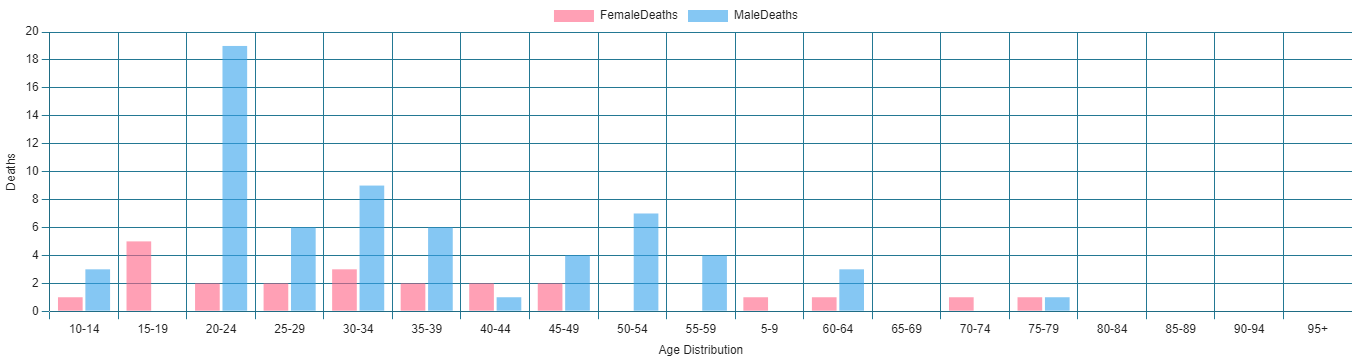